# Homework 7


You are waiting on some datasets from different teams but the approval process may take some time. 

You have no intention to wait! You will generate some fake data to get started. 

Here are some info you expect from the management:
* Employees dataset contains employee id, name, lastname, phone, state (~ 10K records) (Use states of US east coast only) 
* Salary dataset contains employee id, department id, yearly salary
* Department dataset contains department id, department name (5-10 departments) 

Here are the questions expected to be answered:

1. Visualize the average salary of each department
1. Visualize the total number of employees living in each state for each department
1. Visualize salary distribution of different states
1. Visualize salary distribution of different departments

You can use faker library (but you don't have to): https://faker.readthedocs.io/en/master/

`Optional:` 

Try to make dataframes realistic. 
* Salary distribution as normal distribution
* Salary of different states can be higher for 5-10K compared to other states


In [1]:
#!pip install faker

In [2]:
import numpy as np
import pandas as pd
from faker import Faker
import random

In [4]:
fake = Faker()

In [5]:
for _ in range(10):
    print(fake.name())

Miranda Lopez
William Miller
Eric Wall
David Baker
Doris Nguyen
Kimberly Gutierrez
Mary Lee
Evan Perry
Felicia Greene
Renee Holmes


##### Employees dataset contains employee id, name, lastname, phone, state 

In [148]:
def create_rows(num=1):
    output = [{"Eid": fake.ein(),
               "Name":fake.first_name(),
               "Last_name":fake.last_name(),
               "Phone":fake.unique.phone_number(),
               "State":fake.state(),
               } for x in range(num)]
    return output

In [149]:
employee = pd.DataFrame(create_rows(5000))

In [156]:
employee

,Eid,Name,Last_name,Phone,State
0,81-7233668,Angela,Jackson,+1-480-595-2367x0057,North Dakota
1,53-3206365,Brenda,Davis,212-806-8195x886,Illinois
2,90-2416406,Jean,Leonard,322-500-4386x418,West Virginia
3,75-9541396,Anthony,Hall,(791)341-1672x7142,Wyoming
4,75-8161784,Mark,Hernandez,9092930348,Texas
...,...,...,...,...,...
4995,59-8747162,Nathan,Wang,746.004.2894,Idaho
4996,21-5300828,Whitney,Little,+1-207-104-7385,Kentucky
4997,42-6318642,Jaime,Camacho,+1-250-473-0837x07979,Utah
4998,39-6268313,Vanessa,Mitchell,(282)317-9879x5799,Iowa


In [151]:
def create_rows(num=1):
    output = [{"Dept_Id": fake.random_int(min = 1, max = 10),
               "Salary": np.random.uniform(10000, 100000),
               } for x in range(num)]
    return output

##### Salary dataset contains employee id, department id, yearly salary

In [152]:
salary = pd.DataFrame(create_rows(5000))

In [153]:
salary['Eid'] = employee['Eid']

In [155]:
salary

,Dept_Id,Salary,Eid
0,1,91358.815742,81-7233668
1,4,35547.067155,53-3206365
2,4,84570.323045,90-2416406
3,3,55585.752355,75-9541396
4,6,93696.641354,75-8161784
...,...,...,...
4995,3,92828.010661,59-8747162
4996,2,21077.175114,21-5300828
4997,3,31850.729013,42-6318642
4998,7,41156.423121,39-6268313


##### Department dataset contains department id, department name

In [98]:
department = pd.DataFrame()

In [104]:
department['Dept_Id'] = range(1,11)

In [106]:
department['Dept_Name'] = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10']

In [108]:
department

,Dept_Id,Dept_Name
0,1,D1
1,2,D2
2,3,D3
3,4,D4
4,5,D5
5,6,D6
6,7,D7
7,8,D8
8,9,D9
9,10,D10


In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

##### Q1. Visualize the average salary of each department

In [116]:
grouped_salary = salary.groupby('Dept_Id').Salary.mean()

In [117]:
grouped_salary

Dept_Id
1     55405.202469
2     54340.329745
3     53908.527817
4     54003.879430
5     54078.643306
6     54735.254357
7     54198.885865
8     54064.061923
9     56338.218013
10    55666.261646
Name: Salary, dtype: float64

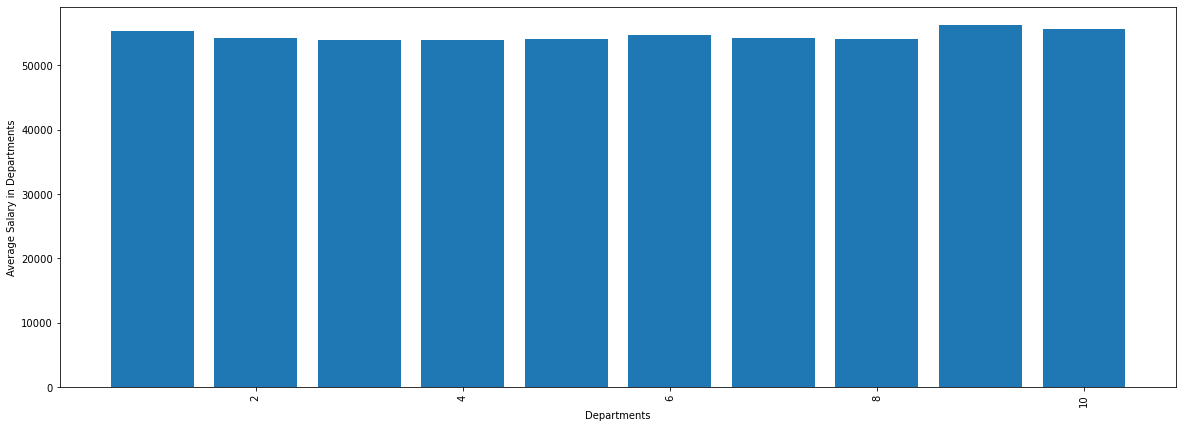

In [121]:
plt.figure(figsize = (20, 7))
plt.bar(grouped_salary.index, grouped_salary.values)
plt.xlabel('Departments')
plt.ylabel('Average Salary in Departments')
plt.xticks(rotation = 90)
plt.show()

##### Q2. Visualize the total number of employees living in each state for each department

In [157]:
merged_data = pd.merge(salary, employee, on = 'Eid')
merged_data

,Dept_Id,Salary,Eid,Name,Last_name,Phone,State
0,1,91358.815742,81-7233668,Angela,Jackson,+1-480-595-2367x0057,North Dakota
1,4,35547.067155,53-3206365,Brenda,Davis,212-806-8195x886,Illinois
2,4,84570.323045,90-2416406,Jean,Leonard,322-500-4386x418,West Virginia
3,3,55585.752355,75-9541396,Anthony,Hall,(791)341-1672x7142,Wyoming
4,6,93696.641354,75-8161784,Mark,Hernandez,9092930348,Texas
...,...,...,...,...,...,...,...
4995,3,92828.010661,59-8747162,Nathan,Wang,746.004.2894,Idaho
4996,2,21077.175114,21-5300828,Whitney,Little,+1-207-104-7385,Kentucky
4997,3,31850.729013,42-6318642,Jaime,Camacho,+1-250-473-0837x07979,Utah
4998,7,41156.423121,39-6268313,Vanessa,Mitchell,(282)317-9879x5799,Iowa


In [158]:
merged_data

,Dept_Id,Salary,Eid,Name,Last_name,Phone,State
0,1,91358.815742,81-7233668,Angela,Jackson,+1-480-595-2367x0057,North Dakota
1,4,35547.067155,53-3206365,Brenda,Davis,212-806-8195x886,Illinois
2,4,84570.323045,90-2416406,Jean,Leonard,322-500-4386x418,West Virginia
3,3,55585.752355,75-9541396,Anthony,Hall,(791)341-1672x7142,Wyoming
4,6,93696.641354,75-8161784,Mark,Hernandez,9092930348,Texas
...,...,...,...,...,...,...,...
4995,3,92828.010661,59-8747162,Nathan,Wang,746.004.2894,Idaho
4996,2,21077.175114,21-5300828,Whitney,Little,+1-207-104-7385,Kentucky
4997,3,31850.729013,42-6318642,Jaime,Camacho,+1-250-473-0837x07979,Utah
4998,7,41156.423121,39-6268313,Vanessa,Mitchell,(282)317-9879x5799,Iowa


In [165]:
merged_data.groupby(["State", "Dept_Id"]).Eid.count().plot.bar(figsize=(1000, 500), fontsize=35, width=0.8)

<AxesSubplot:xlabel='State,Dept_Id'>

ValueError: Image size of 72000x36000 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 72000x36000 with 1 Axes>

##### Q3. Visualize salary distribution of different states

##### Q4. Visualize salary distribution of different departments

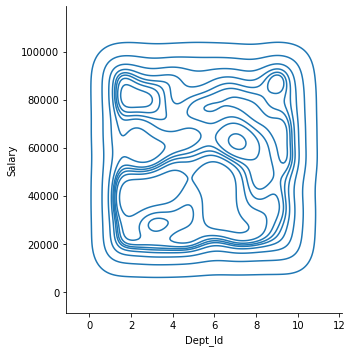

In [132]:
sns.displot(data = salary, x = 'Dept_Id', y = 'Salary', kind = 'kde')